In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
import cv2

from sklearn import set_config
set_config(display='text')

Image shape: (1067, 1600, 3)
dtype: uint8


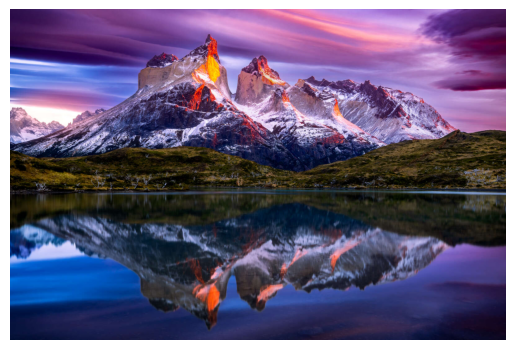

In [2]:
img = cv2.imread("/kaggle/input/hi-res-imgs/20230331-_3310123-edit-ftsmithphotos.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert from BGR to RGB

print("Image shape:", img.shape)
print("dtype:", img.dtype)

plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
data = img / 255.0
pixels = data.reshape(-1, 3)

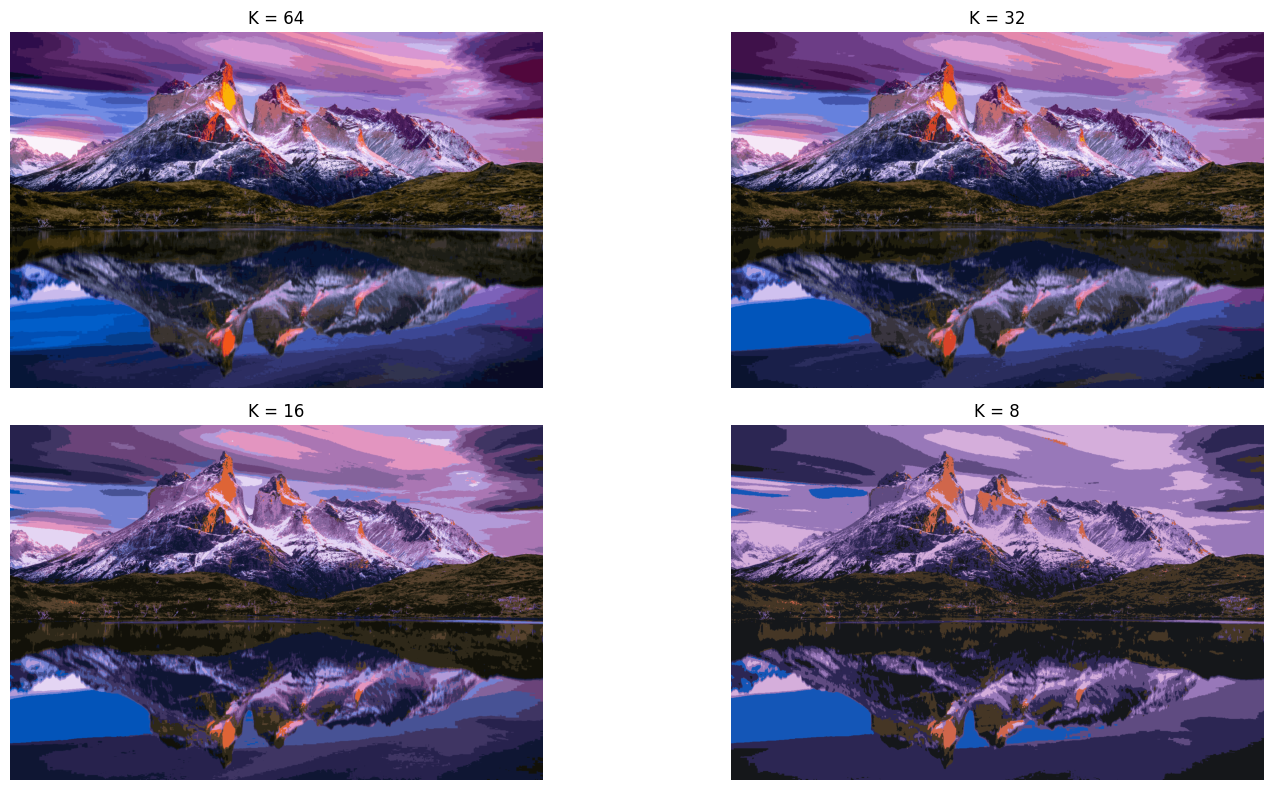

In [4]:
k_values = [64, 32, 16, 8]

plt.figure(figsize=(16, 8))

for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(pixels)

    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    quantized_img = new_colors.reshape(img.shape)

    plt.subplot(2, 2, i)
    plt.imshow(quantized_img)
    plt.title(f"K = {k}")
    plt.axis("off")

plt.tight_layout()
plt.show()